## Read and create binary files for AWG

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import struct

In [22]:
# read the file
f = open("Waveform.bin", mode="rb")
 
data = f.read()

print(type(data))
print(data)
f.close()

<class 'bytes'>
b"\x00\x00\x0c\n\x04\x14\xe0\x1d\x8c'\xfc0\x1c:\xe0B<K S\x80ZTa\x8cg m\x0cr@v\xbcyt|l~\x98\x7f\xfc\x7f\x98\x7fl~t|\xbcy@v\x0cr m\x8cgTa\x80Z S<K\xe0B\x1c:\xfc0\x8c'\xe0\x1d\x04\x14\x0c\n\x00\x00\xf4\xf5\xfc\xeb \xe2t\xd8\x04\xcf\xe4\xc5 \xbd\xc4\xb4\xe0\xac\x80\xa5\xac\x9et\x98\xe0\x92\xf4\x8d\xc0\x89D\x86\x8c\x83\x94\x81h\x80\x04\x80h\x80\x94\x81\x8c\x83D\x86\xc0\x89\xf4\x8d\xe0\x92t\x98\xac\x9e\x80\xa5\xe0\xac\xc4\xb4 \xbd\xe4\xc5\x04\xcft\xd8 \xe2\xfc\xeb\xf4\xf5\x00\x00\x0c\n\x04\x14\xe0\x1d\x8c'\xfc0\x1c:\xe0B<K S\x80ZTa\x8cg m\x0cr@v\xbcyt|l~\x98\x7f\xfc\x7f\x98\x7fl~t|\xbcy@v\x0cr m\x8cgTa\x80Z S<K\xe0B\x1c:\xfc0\x8c'\xe0\x1d\x04\x14\x0c\n\x00\x00\xf4\xf5\xfc\xeb \xe2t\xd8\x04\xcf\xe4\xc5 \xbd\xc4\xb4\xe0\xac\x80\xa5\xac\x9et\x98\xe0\x92\xf4\x8d\xc0\x89D\x86\x8c\x83\x94\x81h\x80\x04\x80h\x80\x94\x81\x8c\x83D\x86\xc0\x89\xf4\x8d\xe0\x92t\x98\xac\x9e\x80\xa5\xe0\xac\xc4\xb4 \xbd\xe4\xc5\x04\xcft\xd8 \xe2\xfc\xeb\xf4\xf5\x00\x00\x0c\n\x04\x14\xe0\x1d\x8c'\xfc0\x1c:\

0.0
2572.0
5124.0
7648.0
10124.0
12540.0
14876.0
17120.0
19260.0
21280.0
23168.0
24916.0
26508.0
27936.0
29196.0
30272.0
31164.0
31860.0
32364.0
32664.0
32764.0
32664.0
32364.0
31860.0
31164.0
30272.0
29196.0
27936.0
26508.0
24916.0
23168.0
21280.0
19260.0
17120.0
14876.0
12540.0
10124.0
7648.0
5124.0
2572.0
0.0
62964.0
60412.0
57888.0
55412.0
52996.0
50660.0
48416.0
46276.0
44256.0
42368.0
40620.0
39028.0
37600.0
36340.0
35264.0
34372.0
33676.0
33172.0
32872.0
32772.0
32872.0
33172.0
33676.0
34372.0
35264.0
36340.0
37600.0
39028.0
40620.0
42368.0
44256.0
46276.0
48416.0
50660.0
52996.0
55412.0
57888.0
60412.0
62964.0
0.0
2572.0
5124.0
7648.0
10124.0
12540.0
14876.0
17120.0
19260.0
21280.0
23168.0
24916.0
26508.0
27936.0
29196.0
30272.0
31164.0
31860.0
32364.0
32664.0
32764.0
32664.0
32364.0
31860.0
31164.0
30272.0
29196.0
27936.0
26508.0
24916.0
23168.0
21280.0
19260.0
17120.0
14876.0
12540.0
10124.0
7648.0
5124.0
2572.0
0.0
62964.0
60412.0
57888.0
55412.0
52996.0
50660.0
48416.0
4627

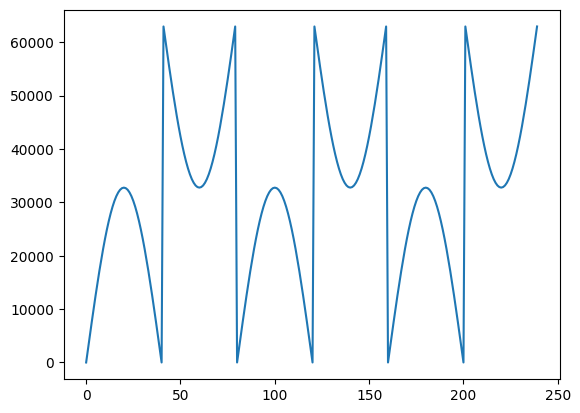

In [23]:
N = int(len(data)/2)
x = np.zeros((N,))
for i in range(N):
    x[i] = data[2*i] + data[2*i+1]*256
    print(x[i])
plt.plot(x)


10079


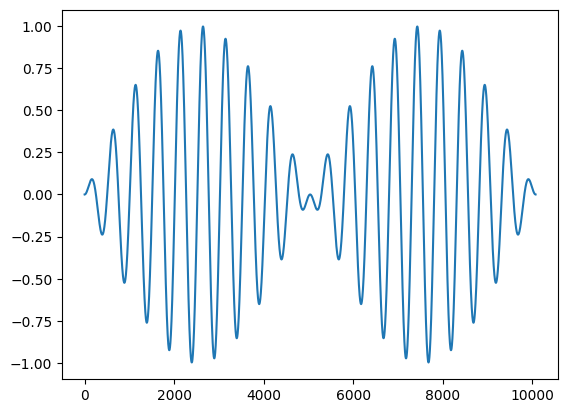

In [36]:
dx = 1/(48*42)
x = np.arange(start=0,stop=5-dx,step=dx)
y1 = np.sin(x*2*np.pi*4)
y2 = np.sin(x*2*np.pi*0.2)
y = y1*y2
y[0] = 0.000001
plt.plot(y)
print(len(y))

In [32]:
def mapping(waveform):
    '''waveform must be between 1 and -1'''
    v1 = waveform*32767
    v2 = (-1*np.sign(waveform) + 1)*32768
    return (v1+v2).astype(int)


In [37]:
waveform = y
mapped = mapping(waveform)
for element in mapped:
    binary = format(element, '016b')
    msb = binary[:8]
    lsb = binary[8:]
    pack = struct.pack("!BB",int(lsb,2),int(msb,2))
    with open("waveform4.bin","ab") as waveform_file:
        waveform_file.write(pack)
waveform_file.close()

: 

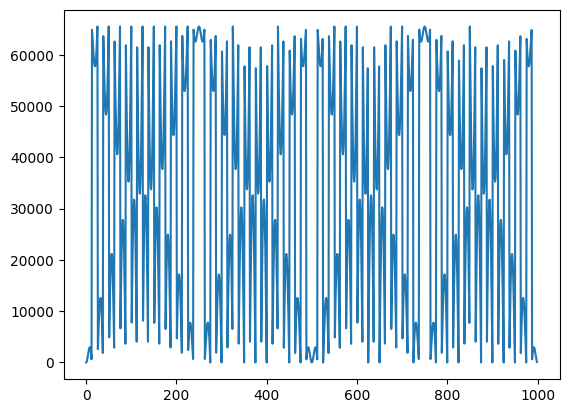

In [27]:
mapped = mapping(y)
plt.plot(mapped)